In [2]:
import ntplib
import time

import tqdm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates

import allantools

import pandas as pd
from scipy.stats import skew

In [307]:
current_frequency = pd.read_csv('../data/SrTime.csv', comment='#', sep=',')

current_frequency['Time'] = pd.to_datetime(current_frequency['Time'], format='ISO8601')
current_frequency['Data Logged Time'] = pd.to_datetime(current_frequency['Data Logged Time'], format='ISO8601')

current_frequency

,Index,Time,Time Deviation,Si Freq,H Freq,Diff Freq,Data Logged Time
0,0,2025-07-11 13:27:48.000,0.000000e+00,2.500045e+08,2.510000e+08,995532.689608,2025-07-11 13:27:47.965
1,1,2025-07-11 13:27:48.100,4.810983e-14,2.500045e+08,2.510000e+08,995532.689887,2025-07-11 13:27:48.065
2,2,2025-07-11 13:27:48.200,2.163232e-13,2.500045e+08,2.510000e+08,995532.690188,2025-07-11 13:27:48.165
3,3,2025-07-11 13:27:48.300,4.847478e-13,2.500045e+08,2.510000e+08,995532.690440,2025-07-11 13:27:48.266
4,4,2025-07-11 13:27:48.400,7.732361e-13,2.500045e+08,2.510000e+08,995532.690490,2025-07-11 13:27:48.365
...,...,...,...,...,...,...,...
8407263,8407316,2025-07-21 06:59:59.600,-3.596634e-10,2.500045e+08,2.510000e+08,995532.689932,2025-07-21 06:59:59.484
8407264,8407317,2025-07-21 06:59:59.700,-3.596854e-10,2.500045e+08,2.510000e+08,995532.689721,2025-07-21 06:59:59.584
8407265,8407318,2025-07-21 06:59:59.800,-3.598010e-10,2.500045e+08,2.510000e+08,995532.689486,2025-07-21 06:59:59.684
8407266,8407319,2025-07-21 06:59:59.900,-3.597289e-10,2.500045e+08,2.510000e+08,995532.689957,2025-07-21 06:59:59.784


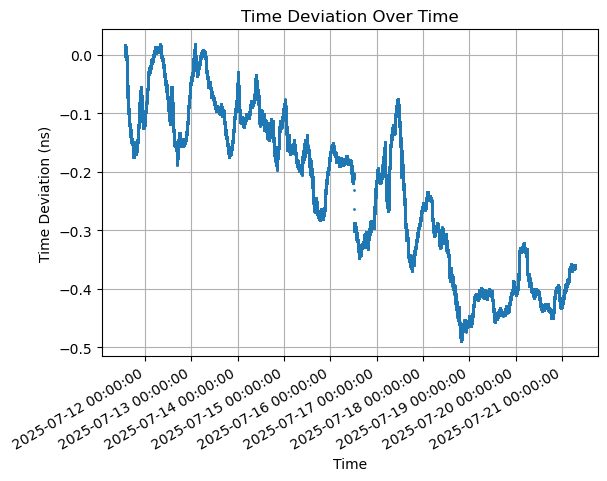

In [308]:
plt.plot(current_frequency['Time'], current_frequency['Time Deviation']*1e9, 'o', markersize=1)
plt.xlabel('Time')
plt.ylabel('Time Deviation (ns)')
plt.title('Time Deviation Over Time')
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.show()

In [305]:
 (-8.238383023387408e-12 - -7.187e-12 ) / -2.333e-20 / 48600

927.2779915538271

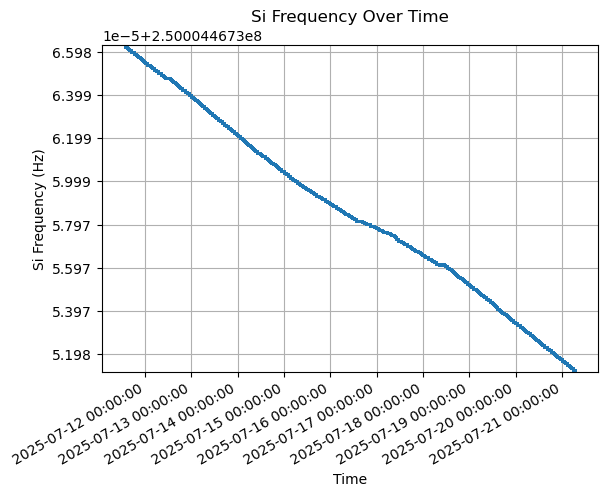

In [295]:
plt.plot(current_frequency['Time'], current_frequency['Si Freq'], 'o', markersize=1)
plt.xlabel('Time')
plt.ylabel('Si Frequency (Hz)')
plt.ylim(current_frequency['Si Freq'].min(), current_frequency['Si Freq'].max())
plt.title('Si Frequency Over Time')
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.show()

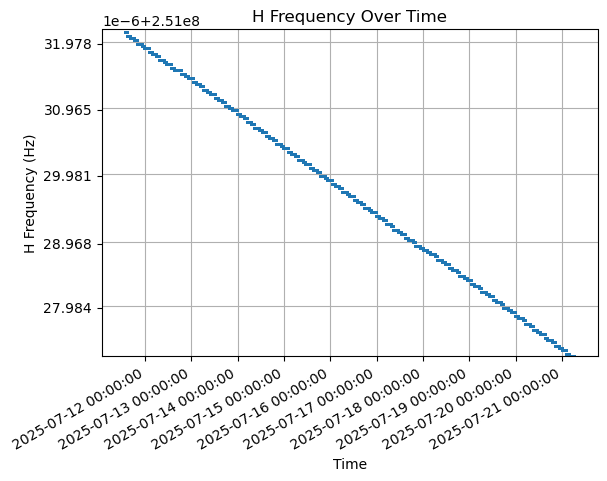

In [296]:
plt.plot(current_frequency['Time'], current_frequency['H Freq'], 'o', markersize=1)
plt.xlabel('Time')
plt.ylabel('H Frequency (Hz)')
plt.ylim(current_frequency['H Freq'].min(), current_frequency['H Freq'].max())
plt.title('H Frequency Over Time')
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.show()

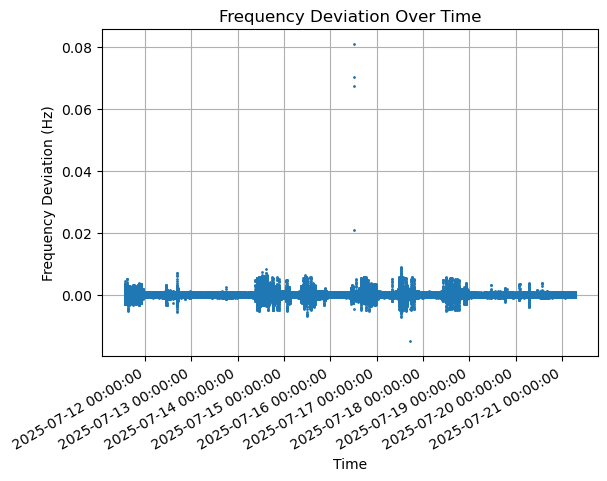

In [297]:
plt.plot(current_frequency['Time'], current_frequency['H Freq'] - current_frequency['Si Freq'] - current_frequency['Diff Freq'], 'o', markersize=1)
plt.xlabel('Time')
plt.ylabel('Frequency Deviation (Hz)')
plt.title('Frequency Deviation Over Time')
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.show()

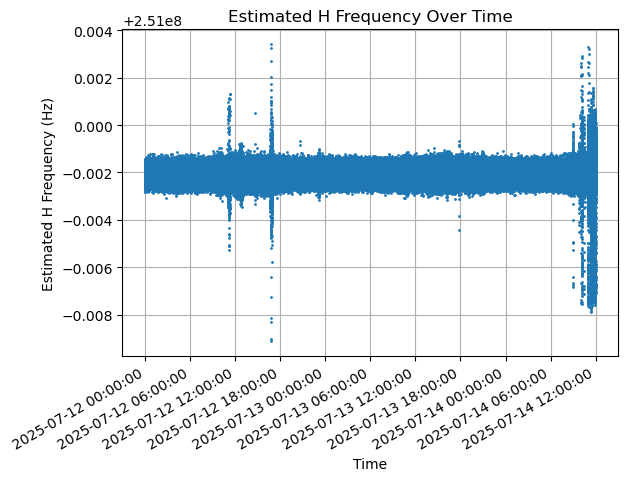

Mean H Frequency: 250999999.99793217 Hz
Mean H Deviation: -8.238383023387408e-12


In [298]:
import datetime
estimated_H_freq = current_frequency['Si Freq'] + current_frequency['Diff Freq']
estimated_H_freq = estimated_H_freq * (1 + 2.333e-20 * (current_frequency['Time'] - datetime.datetime(2025, 7, 11, 13, 27, 48)).dt.total_seconds())
current_frequency['estimated_H_freq'] = estimated_H_freq
current_frequency = current_frequency[(current_frequency['Time'] >= '2025-07-12 00:00:00') & (current_frequency['Time'] <= '2025-07-14 12:00:00')]
plt.plot(current_frequency['Time'], current_frequency['estimated_H_freq'], 'o', markersize=1)
plt.xlabel('Time')
plt.ylabel('Estimated H Frequency (Hz)')
plt.title('Estimated H Frequency Over Time')
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.show()

mean_H_freq = current_frequency['estimated_H_freq'].mean()
print(f"Mean H Frequency: {mean_H_freq} Hz")

mean_H_dev = (current_frequency['estimated_H_freq'].mean() - 251e6) / 251e6
print(f"Mean H Deviation: {mean_H_dev}") 

In [ ]:
file_names = {"Constant_Both": "../data/SrTime_Constant.csv",
                "Constant_H": "../data/SrTime_Varying.csv",
                "Varying_Both": "../data/SrTime_Drifted.csv",
                "DeDrifted": "../data/SrTime_DeDrifted.csv",
                "Weeklong": "../data/SrTime.csv"}
file_data = {}

for key, file in file_names.items():
    print(f"Reading {key} data from {file}")
    file_data[key] = pd.read_csv(file, comment='#', sep=',')
    file_data[key]['Time'] = pd.to_datetime(file_data[key]['Time'], format='ISO8601')
    file_data[key]['Data Logged Time'] = pd.to_datetime(file_data[key]['Data Logged Time'], format='ISO8601')


Reading Constant_Both data from ../data/SrTime_Constant.csv
Reading Constant_H data from ../data/SrTime_Varying.csv
Reading Varying_Both data from ../data/SrTime_Drifted.csv
Reading DeDrifted data from ../data/SrTime_DeDrifted.csv
Reading Weeklong data from ../data/SrTime.csv


In [ ]:
file_data[file_data.keys()].head()

dict_keys(['Constant_Both', 'Constant_H', 'Varying_Both', 'DeDrifted', 'Weeklong'])


TypeError: unhashable type: 'dict_keys'

In [235]:
# Calculate Polynomial fits

from numpy.polynomial import Polynomial as P

degree = 4

constant_fit = P.fit((constant_frequency['Index']) * 0.1, constant_frequency['Time Deviation'], deg=degree)
constant_offset_fit = constant_fit.deriv()
constant_drift_fit = constant_offset_fit.deriv()

interpolated_fit = P.fit((interpolated_frequency['Index']) * 0.1, interpolated_frequency['Time Deviation'], deg=degree)
interpolated_offset_fit = interpolated_fit.deriv()
interpolated_drift_fit = interpolated_offset_fit.deriv()

drifted_fit = P.fit((drifted_frequency['Index']) * 0.1, drifted_frequency['Time Deviation'], deg=degree)
drifted_offset_fit = drifted_fit.deriv()
drifted_drift_fit = drifted_offset_fit.deriv()

/opt/anaconda3/envs/dev/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


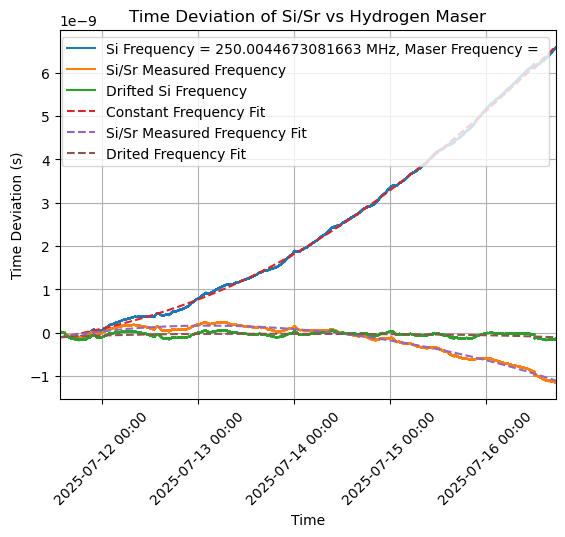

In [236]:
plt.plot(constant_frequency['Time'], constant_frequency['Time Deviation'], label='Si Frequency = 250.0044673081663 MHz, Maser Frequency = ')
plt.plot(interpolated_frequency['Time'], interpolated_frequency['Time Deviation'], label='Si/Sr Measured Frequency')
plt.plot(drifted_frequency['Time'], drifted_frequency['Time Deviation'], label = 'Drifted Si Frequency')

plt.plot(constant_frequency['Time'], constant_fit(constant_frequency['Index'] * 0.1), label='Constant Frequency Fit', linestyle='--')
plt.plot(interpolated_frequency['Time'], interpolated_fit(interpolated_frequency['Index'] * 0.1), label='Si/Sr Measured Frequency Fit', linestyle='--')
plt.plot(drifted_frequency['Time'], drifted_fit(drifted_frequency['Index'] * 0.1), label='Drited Frequency Fit', linestyle='--')

plt.xlim(constant_frequency['Time'].min(), constant_frequency['Time'].max())
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xlabel('Time')
# plt.yscale('symlog', linthresh=1e-10)
plt.ylabel('Time Deviation (s)')

plt.title('Time Deviation of Si/Sr vs Hydrogen Maser')
plt.legend()
plt.grid()
plt.show()

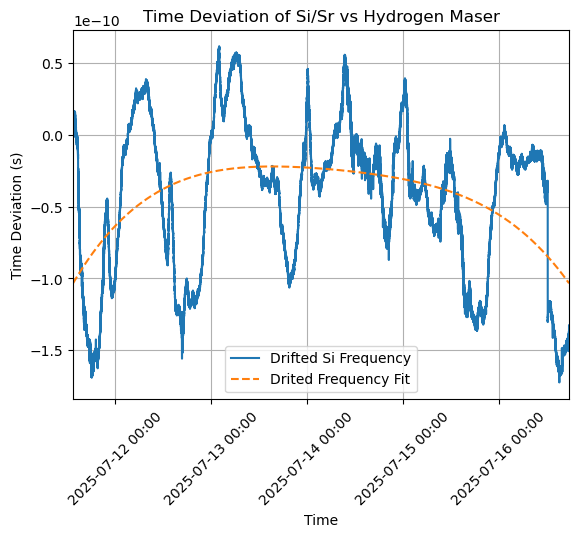

In [180]:
plt.plot(drifted_frequency['Time'], drifted_frequency['Time Deviation'], label = 'Drifted Si Frequency')

plt.plot(drifted_frequency['Time'], drifted_fit(drifted_frequency['Index'] * 0.1), label='Drited Frequency Fit', linestyle='--')

plt.xlim(constant_frequency['Time'].min(), constant_frequency['Time'].max())
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xlabel('Time')
plt.ylabel('Time Deviation (s)')

plt.title('Time Deviation of Si/Sr vs Hydrogen Maser')
plt.legend()
plt.grid()
plt.show()

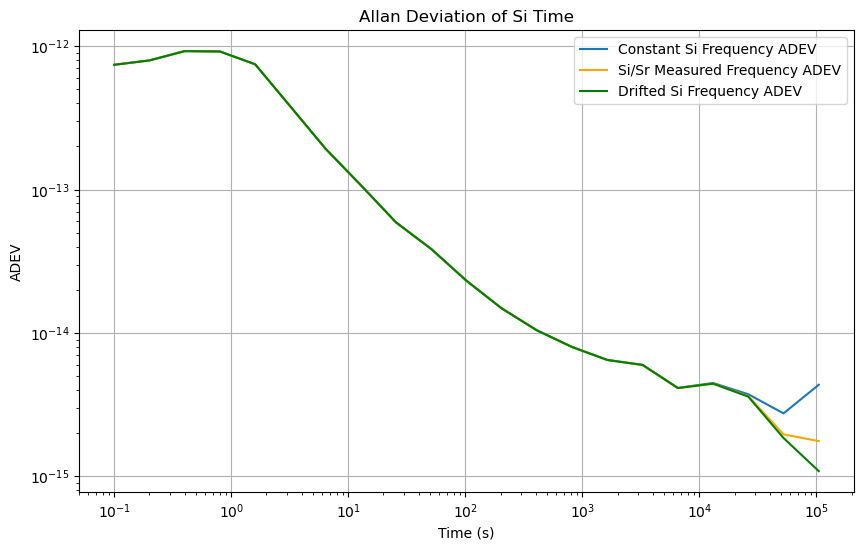

In [181]:
constant_adev = allantools.adev(constant_frequency['Time Deviation'], rate=10)
interpolated_adev = allantools.adev(interpolated_frequency['Time Deviation'], rate=10)
drifted_adev = allantools.adev(drifted_frequency['Time Deviation'], rate=10)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('ADEV')
plt.title('Allan Deviation of Si Time')
plt.plot(constant_adev[0], constant_adev[1], label='Constant Si Frequency ADEV')
plt.plot(interpolated_adev[0], interpolated_adev[1], label='Si/Sr Measured Frequency ADEV', color='orange')
plt.plot(drifted_adev[0], drifted_adev[1], label='Drifted Si Frequency ADEV', color='green')
plt.legend()
plt.grid()
plt.show()

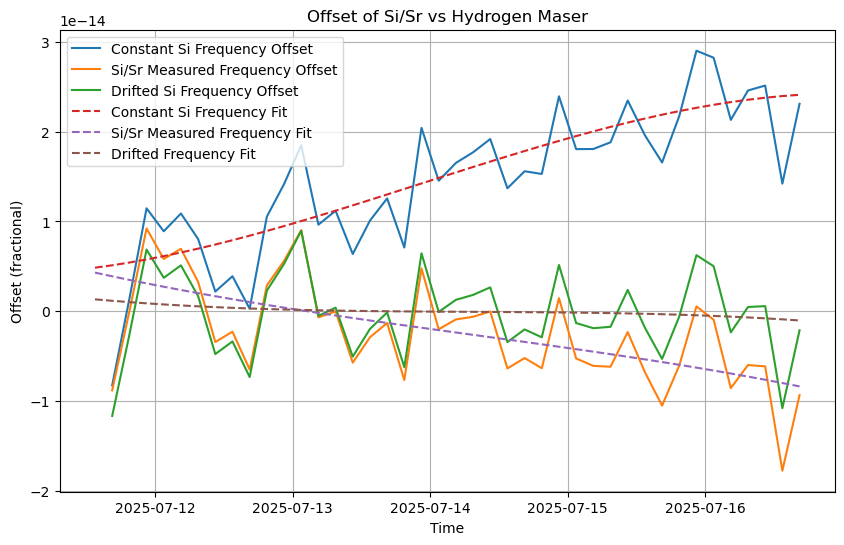

In [182]:
# Plot Frequency over time
# vit = np.diff(signal.savgol_filter(df.dist[::skip] , 41, 2))/np.diff(df.seconde[::skip])
# vit = signal.savgol_filter(df.dist , 101, 1, deriv=1, delta = 1)

import scipy.signal as signal

# Calculate drift for both datasets
# Skip every 3 * 36000th point (6 hour) to reduce noise and speed up the plot
skip = 108000

offset_subset_constant = constant_frequency.iloc[::skip].copy()
offset_subset_interpolated = interpolated_frequency.iloc[::skip].copy()
offset_subset_drifted = drifted_frequency.iloc[::skip].copy()

offset_subset_constant['Offset'] = 10 * np.diff(offset_subset_constant['Time Deviation'], prepend=np.nan) / np.diff(offset_subset_constant['Index'], prepend=np.nan)
offset_subset_interpolated['Offset'] = 10 * np.diff(offset_subset_interpolated['Time Deviation'], prepend=np.nan) / np.diff(offset_subset_interpolated['Index'], prepend=np.nan)
offset_subset_drifted['Offset'] = 10 * np.diff(offset_subset_drifted['Time Deviation'], prepend=np.nan) / np.diff(offset_subset_drifted['Index'], prepend=np.nan)


plt.figure(figsize=(10, 6))
plt.plot(offset_subset_constant['Time'], offset_subset_constant['Offset'], label='Constant Si Frequency Offset')
plt.plot(offset_subset_interpolated['Time'], offset_subset_interpolated['Offset'], label='Si/Sr Measured Frequency Offset')
plt.plot(offset_subset_drifted['Time'], offset_subset_drifted['Offset'], label='Drifted Si Frequency Offset')

plt.plot(offset_subset_constant['Time'], constant_offset_fit(offset_subset_constant['Index'] * 0.1), label='Constant Si Frequency Fit', linestyle='--')
plt.plot(offset_subset_interpolated['Time'], interpolated_offset_fit(offset_subset_interpolated['Index'] * 0.1), label='Si/Sr Measured Frequency Fit', linestyle='--')
plt.plot(offset_subset_drifted['Time'], drifted_offset_fit(offset_subset_drifted['Index'] * 0.1), label='Drifted Frequency Fit', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Offset (fractional)')
plt.title('Offset of Si/Sr vs Hydrogen Maser')
plt.legend()
plt.grid()
plt.show()

In [183]:
# Calculate average offset over interval
constant_offset = np.mean(constant_offset_fit(constant_frequency['Index'] * 0.1))
interpolated_offset = np.mean(interpolated_offset_fit(interpolated_frequency['Index'] * 0.1))
drifted_offset = np.mean(drifted_offset_fit(drifted_frequency['Index'] * 0.1))

print("Mean Offset for drifting Si3: ", constant_offset)
print("Mean Offset for Sr Referenced Si3: ", interpolated_offset)
print("Mean Offset for Drifted Si3: ", drifted_offset)

Mean Offset for drifting Si3:  1.5018885129511637e-14
Mean Offset for Sr Referenced Si3:  -2.2315720250088294e-15
Mean Offset for Drifted Si3:  1.8884937904736607e-22


In [184]:
current_H_offset = -8.241687797358965e-12

print("Current Offset: ", current_H_offset)
print("Suggested Offset for constant: ", current_H_offset + constant_offset)
print("Suggested Offset for Sr Referenced: ", current_H_offset + interpolated_offset)
print("Suggested Offset for Drifted: ", current_H_offset + drifted_offset)

Current Offset:  -8.241687797358965e-12
Suggested Offset for constant:  -8.226668912229453e-12
Suggested Offset for Sr Referenced:  -8.243919369383974e-12
Suggested Offset for Drifted:  -8.241687797170115e-12


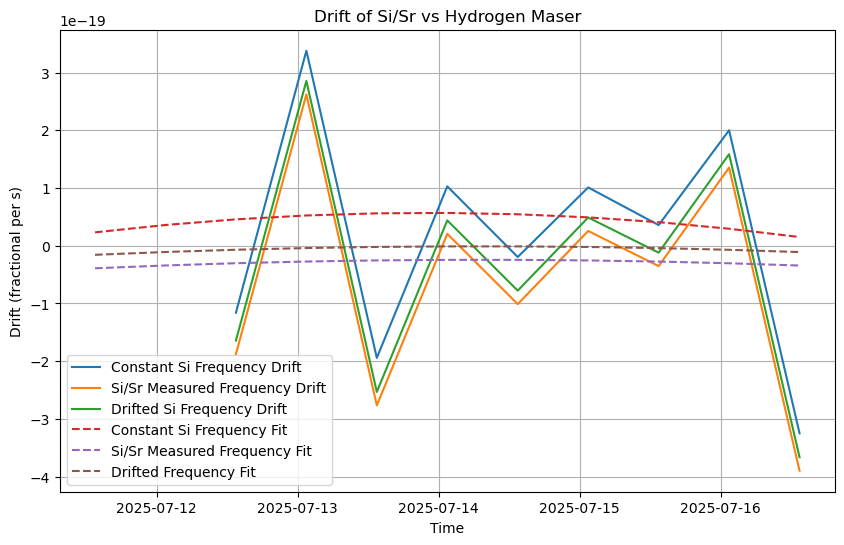

In [185]:
skip = 4
drift_subset_constant = offset_subset_constant.iloc[::skip].copy()
drift_subset_interpolated = offset_subset_interpolated.iloc[::skip].copy()
drift_subset_drifted = offset_subset_drifted.iloc[::skip].copy()

drift_subset_constant['Drift'] = 10 * np.diff(drift_subset_constant['Offset'], prepend=np.nan) / np.diff(drift_subset_constant['Index'], prepend=np.nan)
drift_subset_interpolated['Drift'] = 10 * np.diff(drift_subset_interpolated['Offset'], prepend=np.nan) / np.diff(drift_subset_interpolated['Index'], prepend=np.nan)
drift_subset_drifted['Drift'] = 10 * np.diff(drift_subset_drifted['Offset'], prepend=np.nan) / np.diff(drift_subset_drifted['Index'], prepend=np.nan)

plt.figure(figsize=(10, 6))
plt.plot(drift_subset_constant['Time'], drift_subset_constant['Drift'], label='Constant Si Frequency Drift')
plt.plot(drift_subset_interpolated['Time'], drift_subset_interpolated['Drift'], label='Si/Sr Measured Frequency Drift')
plt.plot(drift_subset_drifted['Time'], drift_subset_drifted['Drift'], label='Drifted Si Frequency Drift')

plt.plot(drift_subset_constant['Time'], constant_drift_fit(drift_subset_constant['Index'] * 0.1), label='Constant Si Frequency Fit', linestyle='--')
plt.plot(drift_subset_interpolated['Time'], interpolated_drift_fit(drift_subset_interpolated['Index'] * 0.1), label='Si/Sr Measured Frequency Fit', linestyle='--')
plt.plot(drift_subset_drifted['Time'], drifted_drift_fit(drift_subset_drifted['Index'] * 0.1), label='Drifted Frequency Fit', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Drift (fractional per s)')
plt.title('Drift of Si/Sr vs Hydrogen Maser')
plt.legend()
plt.grid()
plt.show()

In [186]:
# Calculate average drift over interval
constant_drift = np.mean(constant_drift_fit(constant_frequency['Index'] * 0.1))
interpolated_drift = np.mean(interpolated_drift_fit(interpolated_frequency['Index'] * 0.1))
drifted_drift = np.mean(drifted_drift_fit(drifted_frequency['Index'] * 0.1))

print("Mean Drift for drifting Si3: ", constant_drift, "per s")
print("Mean Drift for Sr Referenced Si3: ", interpolated_drift, "per s")
print("Mean Drift for Drifted Si3: ", drifted_drift, "per s")

print("Expected Drift for st8 Hydrogen Maser:", -2.333e-20, "per s")

Mean Drift for drifting Si3:  4.32338263523517e-20 per s
Mean Drift for Sr Referenced Si3:  -2.8710979492170103e-20 per s
Mean Drift for Drifted Si3:  -5.380979817082159e-21 per s
Expected Drift for st8 Hydrogen Maser: -2.333e-20 per s


In [ ]:
# st8 maser 
# freq drift -2.333*^-20/s -2.016*^-16/day
# 10 MHz offset -7.187*^-12 fractional.
#   // Frequency of the Hydrogen Maser in Hz
#   // 251000000.0 Hz Nominal, with a slight correction
#   // expected to be -7.187e-12
#   // -8.241687797358965e-12, based on detrending 7/12 00:00 to 7/14 12:00
#   // Recalculated after drift calculations -8.238383023387408e-12

#   // Drift rate of the Hydrogen Maser Frequency, fractional per second
#   // expected to be -2.333e-20

In [3]:
client = ntplib.NTPClient()


# offset is for far behind the system clock is relative to the NTP server
# positive values mean the system clock is behind the NTP server

In [183]:
pack = client.request('utcnist.colorado.edu', version=3, timeout=5)

In [185]:
print(f'offset: {pack.offset} seconds\nDelay: {pack.delay} seconds\nReference Time: {pack.ref_time}\nOriginate Time: {pack.orig_time}\nTransmit Time: {pack.tx_time}\nReceive Time: {pack.recv_time}\nDestination Time: {pack.dest_time}')
print(f'Root Delay: {pack.root_delay} seconds\nRoot Dispersion: {pack.root_dispersion} seconds\nStratum: {pack.stratum}\nLeap Indicator: {pack.leap}\nPoll Interval: {pack.poll} seconds\nPrecision: {pack.precision} seconds')

offset: 0.002367734909057617 seconds
Delay: 0.0034689903259277344 seconds
Reference Time: 1752078336.0
Originate Time: 1752078349.74399
Transmit Time: 1752078349.7480946
Receive Time: 1752078349.7480922
Destination Time: 1752078349.7474613
Root Delay: 0.000244140625 seconds
Root Dispersion: 0.00048828125 seconds
Stratum: 1
Leap Indicator: 0
Poll Interval: 13 seconds
Precision: -29 seconds


In [170]:
data = pd.read_csv('offsetlogger.csv', comment='#', names=['txctime', 'txtime', 'localctime', 'localtime', 'offset', 'sigoffset'])
data.head()

,txctime,txtime,localctime,localtime,offset,sigoffset
0,Tue Jul 8 12:08:20 2025,1.751998e+09,Tue Jul 8 12:08:20 2025,1.751998e+09,0.012366,0.000002
1,Tue Jul 8 12:08:25 2025,1.751998e+09,Tue Jul 8 12:08:25 2025,1.751998e+09,0.012197,0.000009
2,Tue Jul 8 12:08:31 2025,1.751998e+09,Tue Jul 8 12:08:31 2025,1.751998e+09,0.012158,0.000006
3,Tue Jul 8 12:08:35 2025,1.751998e+09,Tue Jul 8 12:08:35 2025,1.751998e+09,0.012123,0.000006
4,Tue Jul 8 12:08:40 2025,1.751998e+09,Tue Jul 8 12:08:40 2025,1.751998e+09,0.012049,0.000010


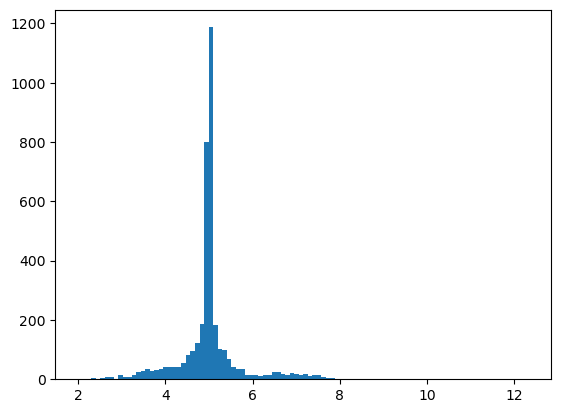

In [171]:
diffs = np.array(data['txtime'][1:]) - data['txtime'][:-1]  # time between NTP requests
plt.hist(diffs, bins=100)
plt.show()

<ErrorbarContainer object of 3 artists>

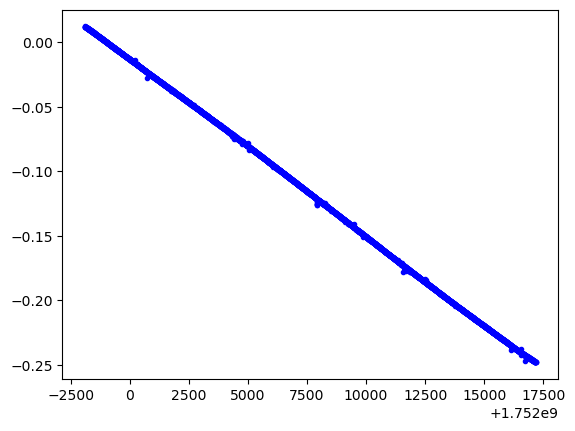

In [172]:
plt.errorbar(data['txtime'], data['offset'], yerr=data['sigoffset'], fmt='.', linestyle='-', color='b', label='NTP Offset')

In [173]:
from numpy.polynomial.polynomial import Polynomial as P

def remove_outliers(data, weights=None, times=None, level=0.5):
    if times is not None:
        if len(data) != len(times):
            raise ValueError("Data and times must have the same length.")
    if weights is not None:
        if len(data) != len(weights):
            raise ValueError("Data and weights must have the same length.")
    if times is not None:
        trend = P.fit(times, data, 3, w=weights)
        deviations = data - trend(times)
    else:
        trend = P.fit(np.arange(len(data)), data, 3, w=weights)
        deviations = data - trend(np.arange(len(data)))

    qts = np.quantile(deviations, [0.25, 0.75])
    iqr = qts[1] - qts[0]
    lower_bound = qts[0] - level * iqr
    upper_bound = qts[1] + level * iqr
    
    trim_data = data[(deviations >= lower_bound) & (deviations <= upper_bound)]

    if times is not None:
        times = times[(deviations >= lower_bound) & (deviations <= upper_bound)]
        if weights is not None:
            weights = weights[(deviations >= lower_bound) & (deviations <= upper_bound)]
            return trim_data, times, weights
        else :
            return trim_data, times
    else:
        return trim_data

adjusted_offset = np.zeros_like(data['offset'])

window = 3000  # seconds
for i in range(0, len(data)):
    if i<30:
        adjusted_offset[i] = data['offset'][i]
        continue

    current_time = data['txtime'][i]

    past_data = data[(data['txtime'] < current_time) & (data['txtime'] >= current_time - window)]
    past_data.loc[past_data['sigoffset'] <= 0, 'sigoffset'] = 0.5e-6  # Remove non-positive sigoffsets

    try:
        past_offset, past_times, past_weights = remove_outliers(past_data['offset'].values, times=past_data['txtime'].values, weights=1/np.pow(past_data['sigoffset'].values,2), level=1)
    except Exception as e:
        print(f"Error processing data at index {i}: {e}")
        print(min(past_data['sigoffset'][past_data['sigoffset'] > 0]))

    if len(past_data) < 5:
        adjusted_offset[i] = data['offset'][i]
        continue

    offset_fit = P.fit(past_times, past_offset, 3, w=past_weights)
    adjusted_offset[i] = data['offset'][i] - offset_fit(current_time)

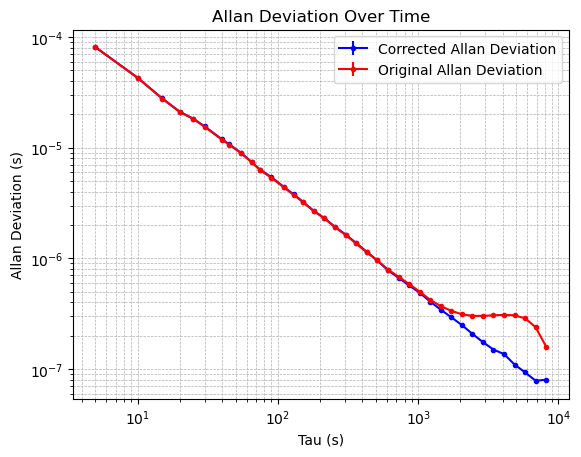

In [174]:
corr_adev = allantools.oadev(adjusted_offset[30:], rate=0.2, taus=np.logspace(0, 15, 61, base=2))
orig_adev = allantools.oadev(data['offset'][30:], rate=0.2, taus=np.logspace(0, 15, 61, base=2))


plt.errorbar(corr_adev[0], corr_adev[1], yerr=corr_adev[2], fmt='.', linestyle='-', color='b', label='Corrected Allan Deviation')
plt.errorbar(orig_adev[0], orig_adev[1], yerr=orig_adev[2], fmt='.', linestyle='-', color='r', label='Original Allan Deviation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tau (s)')
plt.ylabel('Allan Deviation (s)')
plt.title('Allan Deviation Over Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

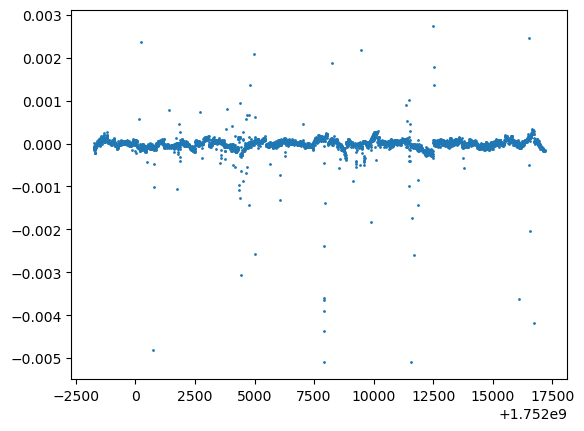

In [175]:
plt.plot(data['txtime'][30:], adjusted_offset[30:], 'o', markersize=1, label='No Outliers')

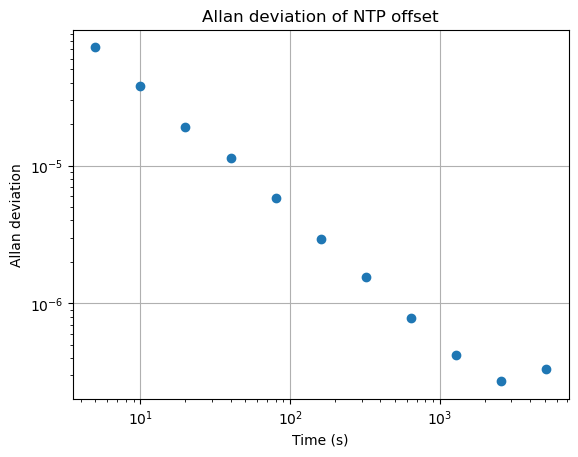

In [53]:
adev = allantools.oadev(data['offset'], rate=0.2)

plt.errorbar(adev[0], adev[1], yerr=adev[2], fmt='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Allan deviation')
plt.title('Allan deviation of NTP offset')
plt.grid()
plt.show()

Range: 2.114096, Bin width: 0.0005000227057710501, Number of bins: 4228


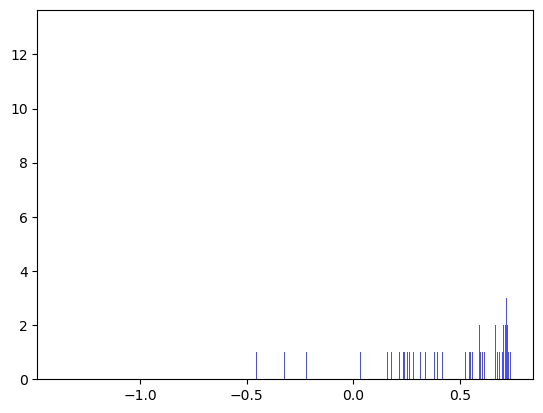

In [116]:
dat = data['offset'].iloc[-300:]
ra = dat.max() - dat.min()
binwidth = 0.0005
nbins = int(ra / binwidth)
print(f"Range: {ra}, Bin width: {ra/nbins}, Number of bins: {nbins}")

plt.hist(dat, bins=nbins, color='blue', alpha=0.7)

plt.show()

In [ ]:
def estimator(dat):
    while abs(skew(dat)) > 1.0:
        n = len(dat)
        ra = dat.max() - dat.min()
        nbins = int(np.sqrt(n))

        hist = np.histogram(dat, bins=nbins)


        likely = hist[0] > n/nbins
        mins = hist[1][:-1][likely]
        maxs = hist[1][1:][likely]
        counts = hist[0][likely]

        for i in range(len(mins)-1, 0, -1):
            if mins[i] == maxs[i-i]:
                mins = np.delete(mins, i)
                maxs = np.delete(maxs, i)
                counts[i-i] += counts[i]
                counts = np.delete(counts, i)

        maxindex = np.argmax(counts)
        min = mins[maxindex]
        max = maxs[maxindex]
        count = counts[maxindex]

        dat = dat[(dat >= min) & (dat <= max)]

    return (np.mean(dat), np.std(dat)/np.sqrt(len(dat)))

<ErrorbarContainer object of 3 artists>

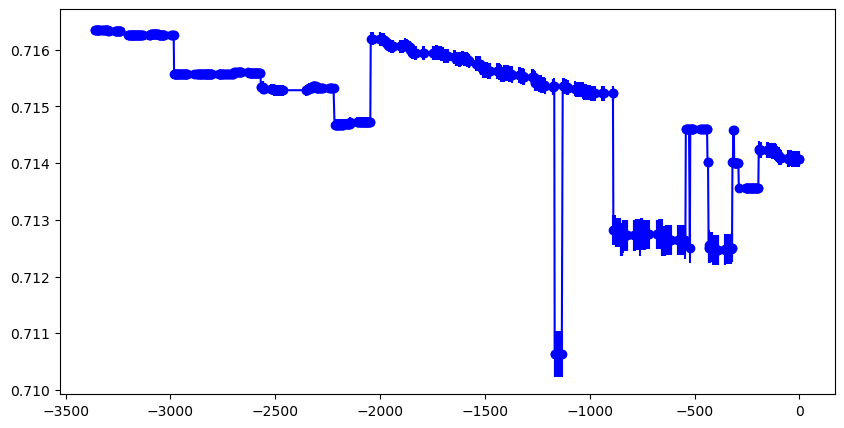

In [179]:
width = 600

txtimes = []
meanoffsets = []
stdoffsets = []

for i in range(width, len(data['offset'])):
    dat = data['offset'].iloc[i-width:i]
    mean, std = estimator(dat)

    txtimes.append(data['txtime'].iloc[i])
    meanoffsets.append(mean)
    stdoffsets.append(std)

txtimes = np.array(txtimes)
meanoffsets = np.array(meanoffsets)
stdoffsets = np.array(stdoffsets)

reltimes = txtimes-txtimes[-1]

fig, ax = plt.subplots(figsize=(10, 5))

plt.errorbar(reltimes, meanoffsets, yerr=stdoffsets, fmt='o', linestyle='-', color='b', label='NTP Offset')


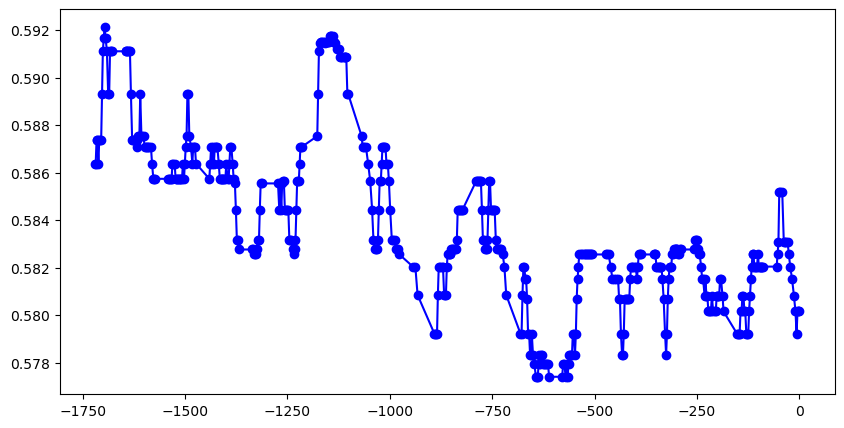

In [164]:
width = 1000

txtimes = []
meanoffsets = []
stdoffsets = []

for i in range(width, len(data['offset'])):
    dat = data['offset'].iloc[i-width:i]
    median = np.median(dat)

    txtimes.append(data['txtime'].iloc[i])
    meanoffsets.append(median)

txtimes = np.array(txtimes)
meanoffsets = np.array(meanoffsets)
stdoffsets = np.array(stdoffsets)

reltimes = txtimes-txtimes[-1]

fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(reltimes, meanoffsets, marker='o', linestyle='-', color='b', label='NTP Offset')


/var/folders/0f/8jqt02nd3wz72b28z311t0d00000gn/T/ipykernel_47447/2344224260.py:15: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, interval=1000)


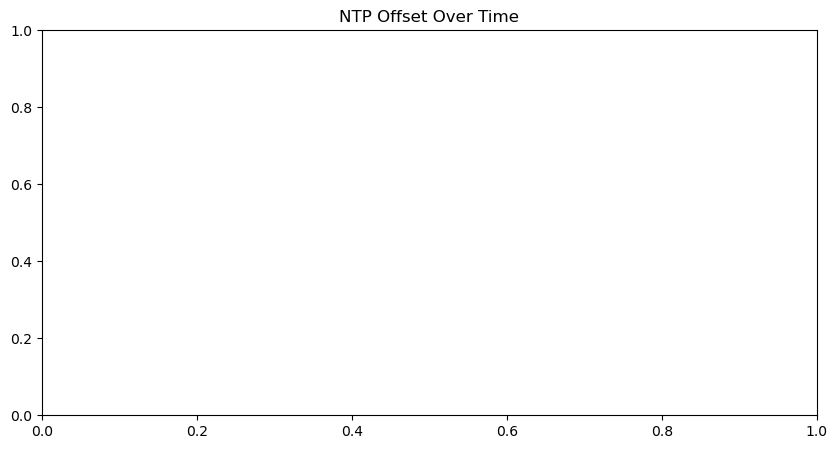

In [18]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax1.set_title('NTP Offset Over Time')

def update(frame):
    data = pd.read_csv('offsetlogger.csv', comment='#', names=['txctime', 'txtime', 'localctime', 'localtime', 'offset'])

    times = data['txtime']
    reltimes = times - times.iloc[-1]
    offsets = data['offset']

    ax1.clear()
    ax1.plot(reltimes, offsets, marker='o', linestyle='-', color='b', label='NTP Offset')

ani = animation.FuncAnimation(fig, update, interval=1000)
plt.show()

In [9]:
%matplotlib inline

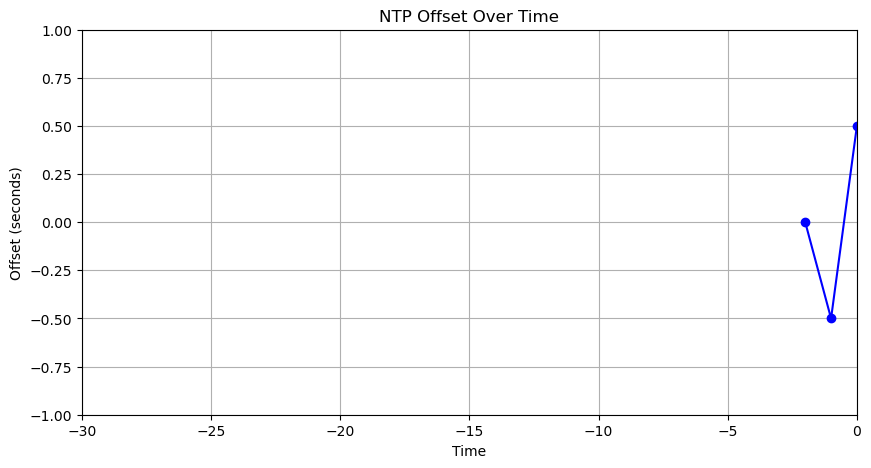

KeyboardInterrupt: 

In [ ]:


fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title('NTP Offset Over Time')

ax.set_xlabel('Time')
ax.set_ylabel('Offset (seconds)')
ax.grid(True)
# Set up the plot

ax.set_xlim(left=-30, right=0)  # Set x-axis limits
ax.set_ylim(bottom=-1, top=1)  # Set y-axis limits


ax.plot([-2,-1,0], [0,-0.5,0.5], marker='o', linestyle='-', color='b', label='NTP Offset')

plt.show()  # Show the initial plot


# Fetch NTP data and plot it in real-time

for i in range(30):
    start = time.time_ns()  # Get the current time in nanoseconds
    response = client.request('time.nist.gov', version=3)
    offset = response.offset  # This will give you the offset in seconds
    end = time.time_ns()  # Get the end time in nanoseconds
    elapsed = end - start  # Calculate the elapsed time in nanoseconds
    txtime = response.tx_time

    times = np.append(times, txtime)
    reltimes = times - times[-1]
    offsets = np.append(offsets, offset)

    for line in ax.lines:
        line.set_xdata(reltimes)
        line.set_ydata(offsets)
    
    fig.canvas.draw()  # Redraw the figure

    plt.show()

    # Update the plot with the new data

    time.sleep(1)  # Sleep for 1 second to avoid overwhelming the server

In [7]:
print(reltimes)
print(offsets)

[-2.46180248  0.        ]
[-0.68230247 -0.20154238]


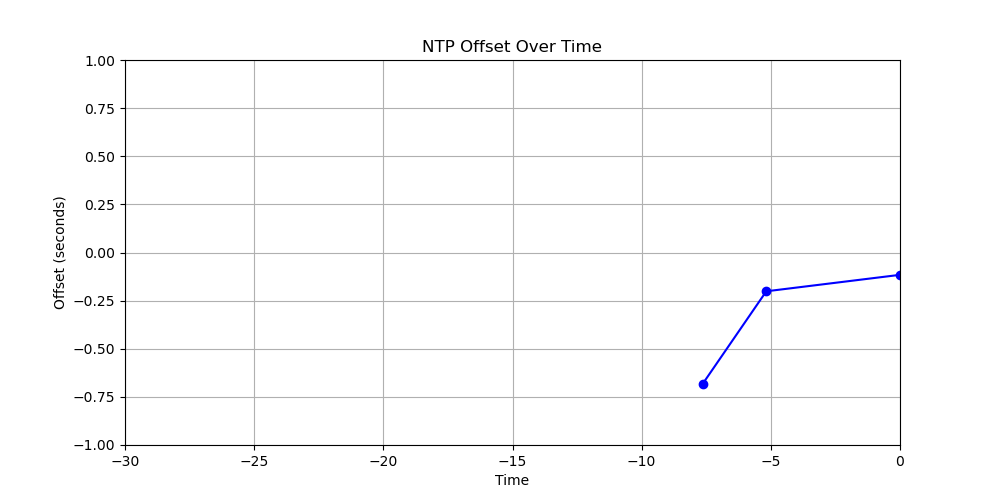

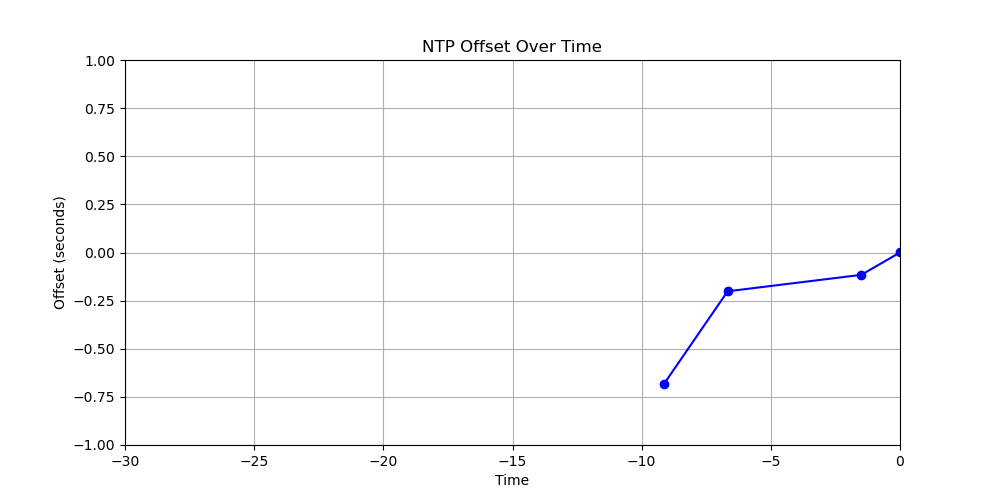

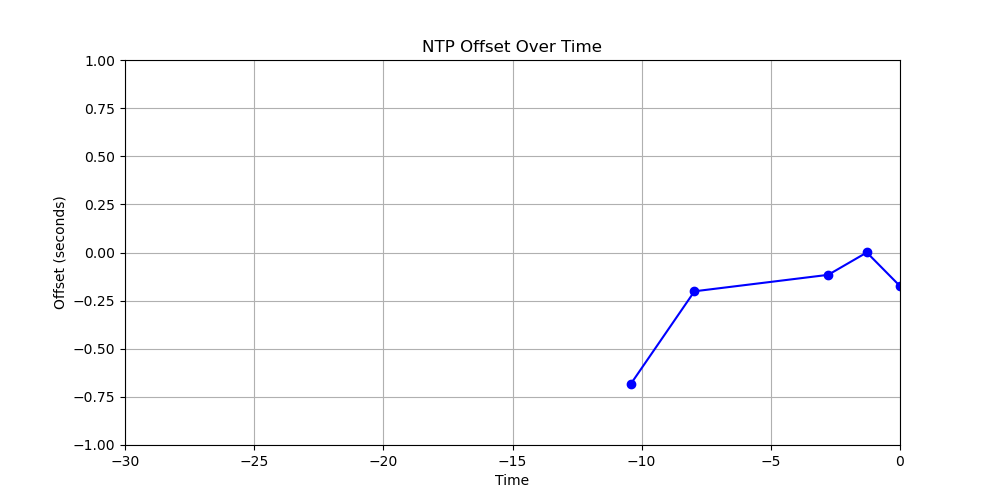

KeyboardInterrupt: 

In [8]:
# Clear previous lines except the first one (if any)
if len(ax.lines) > 1:
    ax.lines = [ax.lines[0]]

# Simulate real-time updating of a single line in a loop
for _ in range(5):
    response = client.request('time.nist.gov', version=3)
    offset = response.offset
    txtime = response.tx_time

    times = np.append(times, txtime)
    reltimes = times - times[-1]
    offsets = np.append(offsets, offset)

    # If no line exists, create one; otherwise, update the existing line
    if len(ax.lines) == 0:
        line, = ax.plot(reltimes, offsets, marker='o', linestyle='-', color='b', label='NTP Offset')
    else:
        ax.lines[0].set_xdata(reltimes)
        ax.lines[0].set_ydata(offsets)

    ax.relim()
    ax.autoscale_view()
    plt.draw()
    plt.pause(1)